In [1]:
%load_ext autoreload
%autoreload 2

## Unsupervised Learning and Extraction of Blinking Patterns

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import espbm

### Data Loading

In [3]:
ear_data = pd.read_csv("data/sample_ear_short.csv")
display(ear_data.head())

ear_l = ear_data["EAR_l"].to_numpy()
ear_r = ear_data["EAR_r"].to_numpy()

Frame     EAR_r     EAR_l
0      0  0.286274  0.269362
1      1  0.291212  0.268412
2      2  0.291212  0.269362
3      3  0.297798  0.270195
4      4  0.291479  0.269233

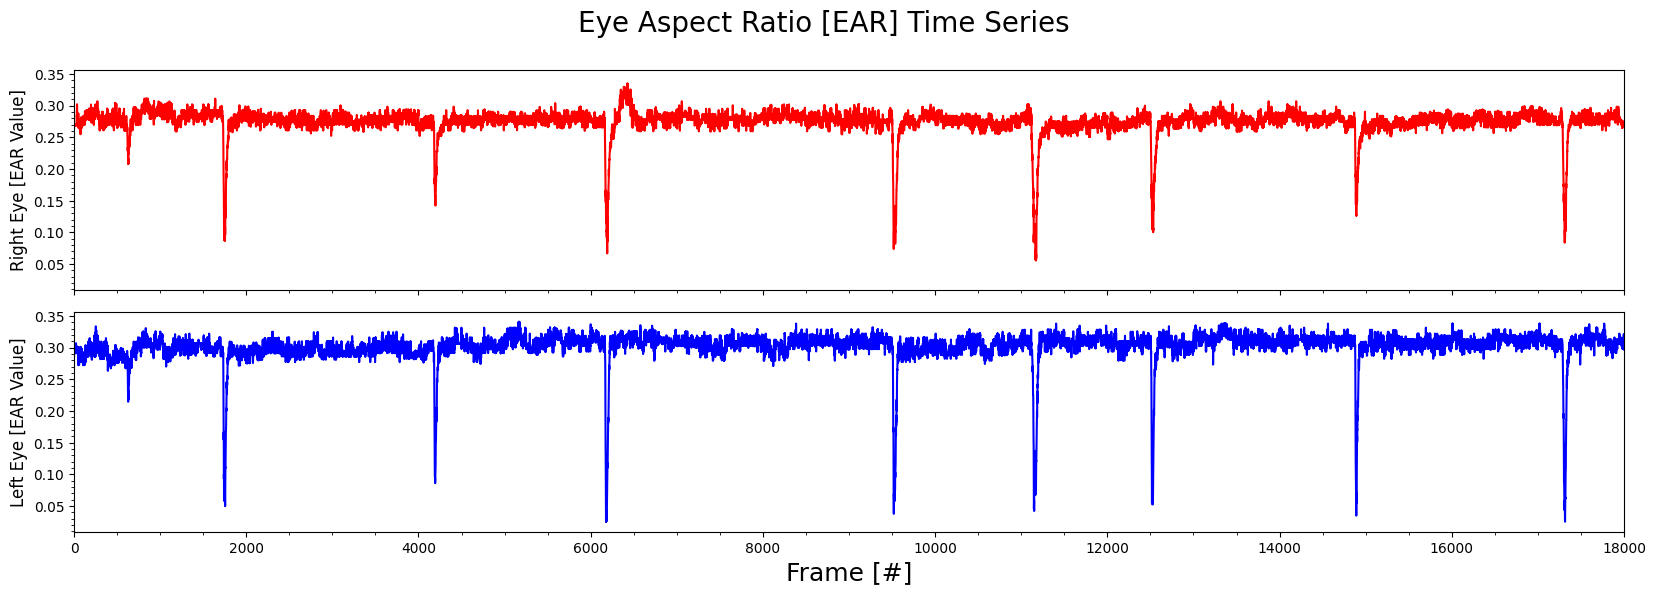

In [4]:
espbm.plot.ear_time_series(ear_l, ear_r)
plt.show()

### Unsupervised Learning of Blinking State

In [5]:
candidates = espbm.unsupervised.extract_candidates(np.concatenate([ear_l, ear_r]))

/home/buechner/anaconda3/envs/espbm/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [6]:
prototype = candidates[0]

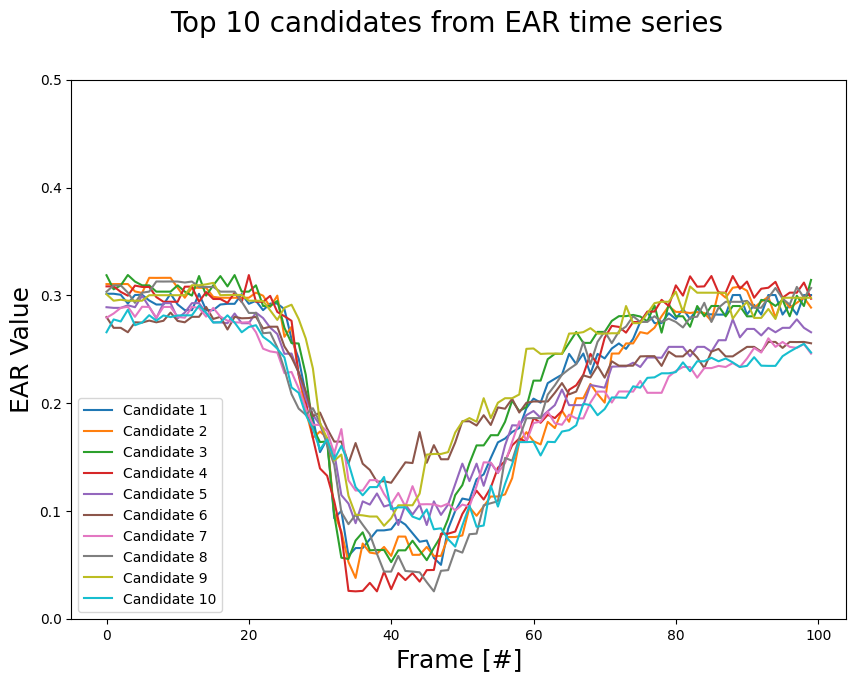

In [7]:
espbm.plot.candidates_overview(candidates=candidates)
plt.show()

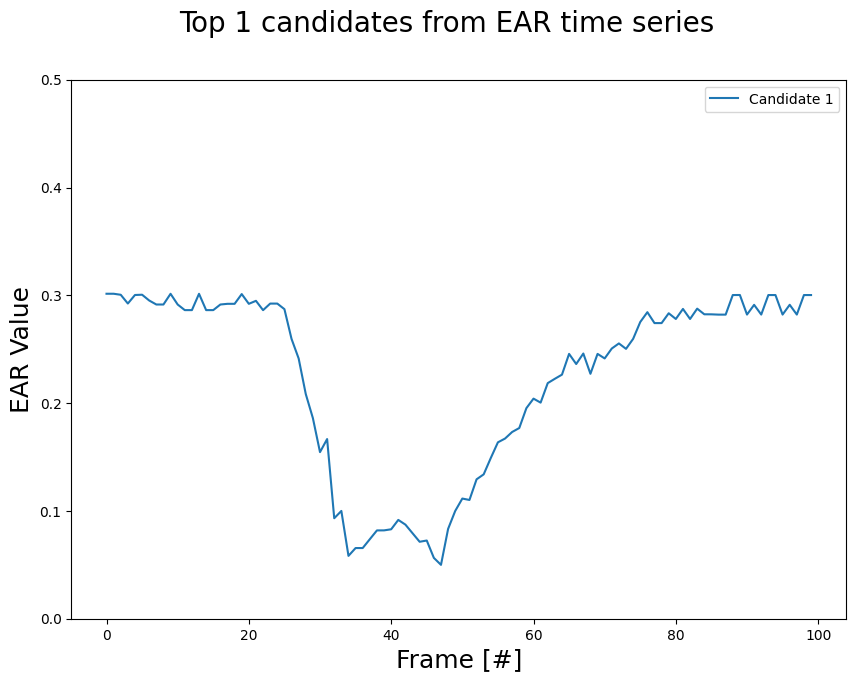

In [8]:
espbm.plot.candidates_overview(candidates=prototype)
plt.show()

### Detection of the Prototype in the Time Series

In [9]:
matches_l = espbm.match.find_prototype(ear_l, prototype, max_prototype_distance=3.0)
matches_r = espbm.match.find_prototype(ear_r, prototype, max_prototype_distance=3.0)

In [10]:
espbm.match.describe(matches_l)

Contains 11 matches
Matches: [[591, 691, 4.54211799664586], [1709, 1809, 2.1264802266890244], [4155, 4255, 2.7390968929682145], [6145, 6245, 3.1460980163222034], [6689, 6789, 7.64305367267573], [9487, 9587, 4.739295662054528], [11118, 11218, 5.550462616380028], [11973, 12073, 7.409097990229975], [12485, 12585, 3.2583760763760066], [14852, 14952, 2.9444718535223777], [17270, 17370, 3.4382259360712535]]


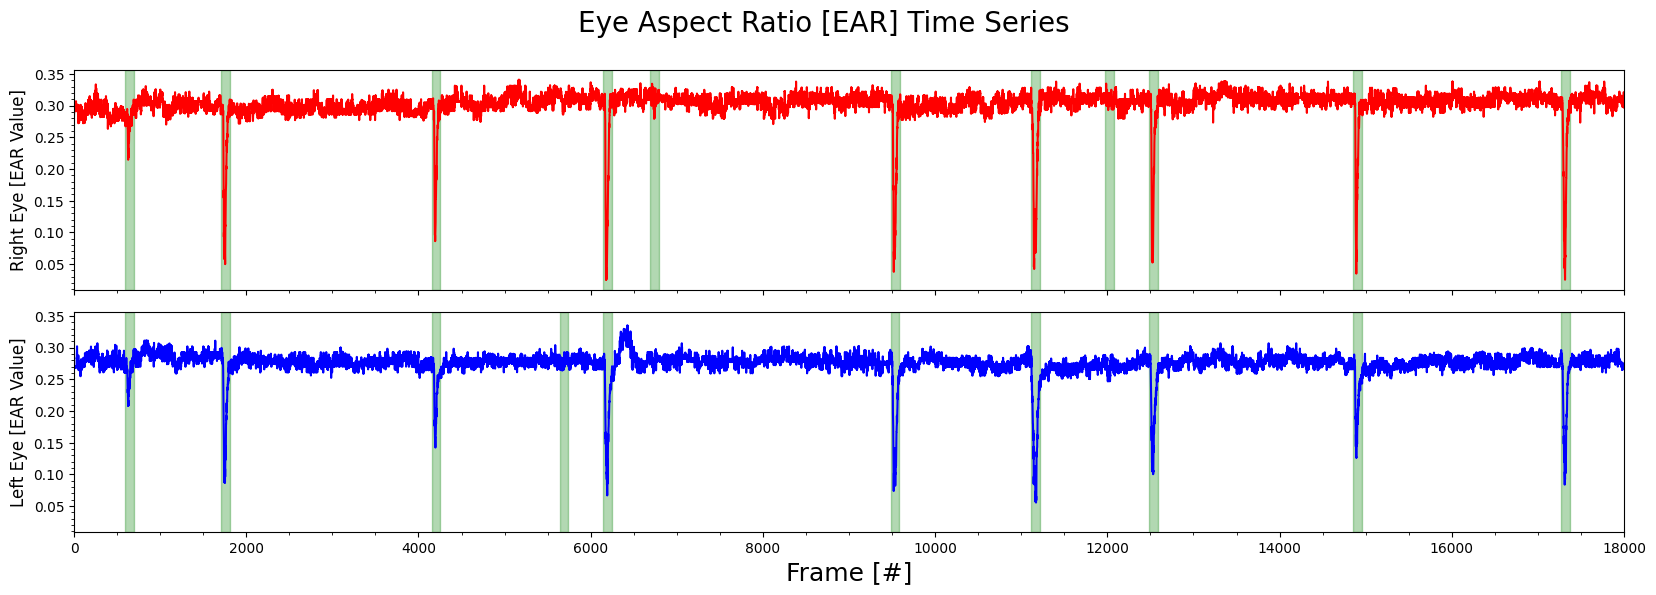

In [11]:
espbm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()

#### Sync the matches between the eyes

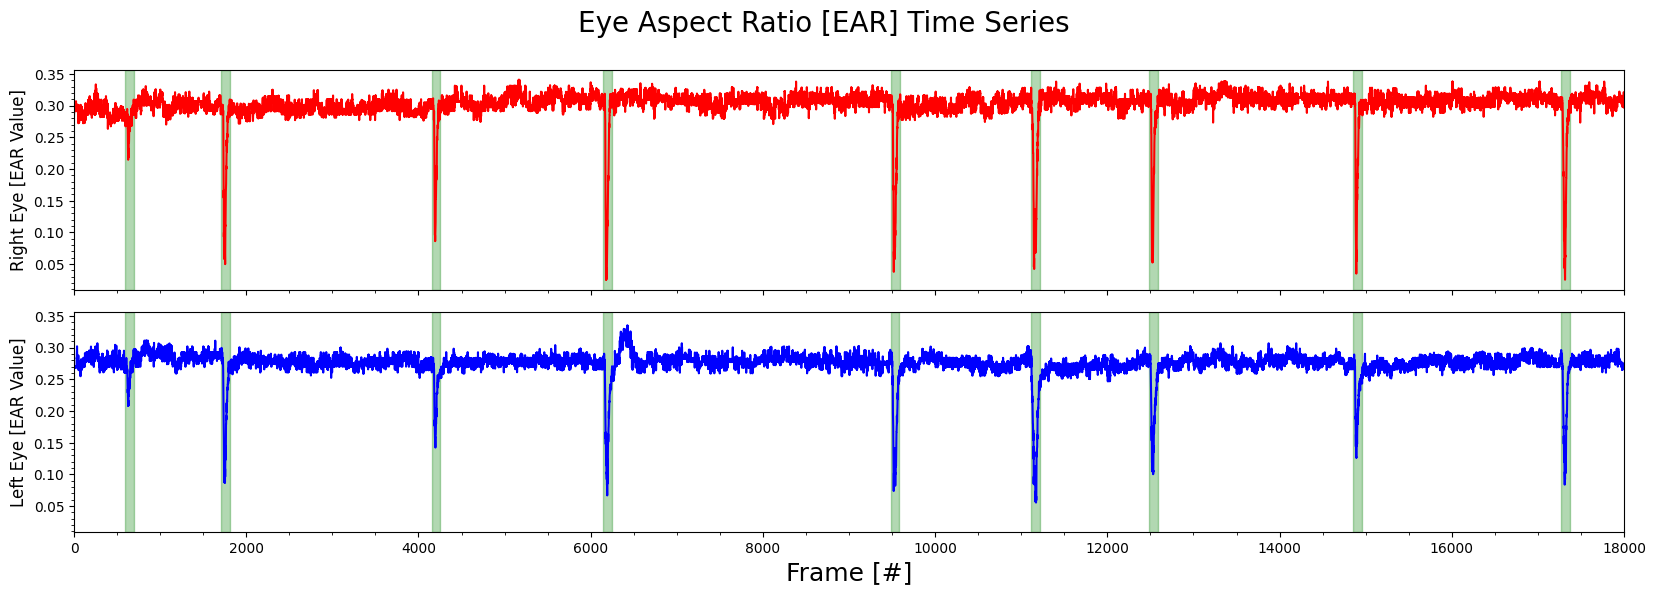

In [12]:
matches_l = espbm.match.find_prototype(ear_l, prototype)
matches_r = espbm.match.find_prototype(ear_r, prototype)
matches_l, matches_r = espbm.match.index_matching(matches_l, matches_r)
espbm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()

### Compare different windwo sizes

#### 50

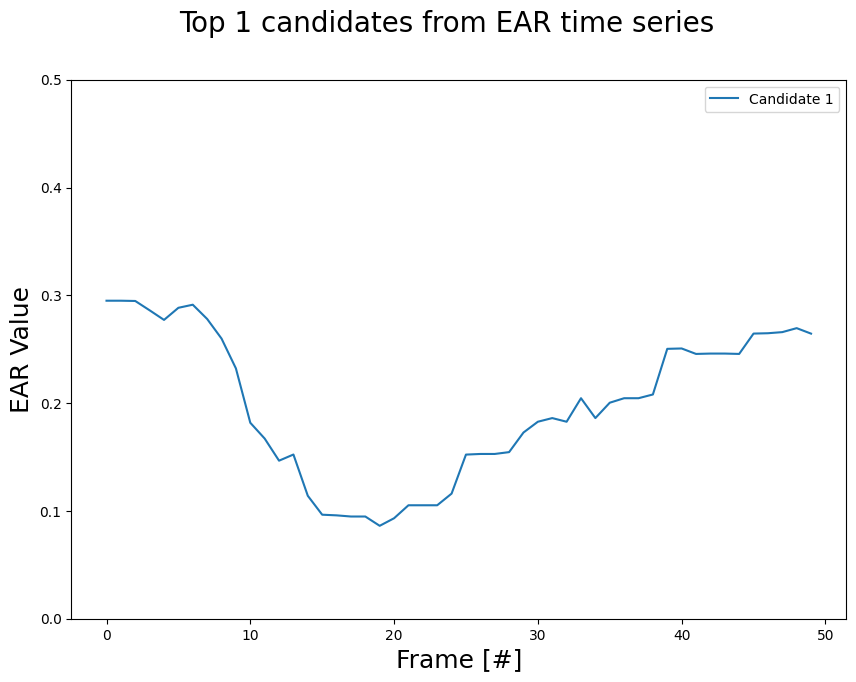

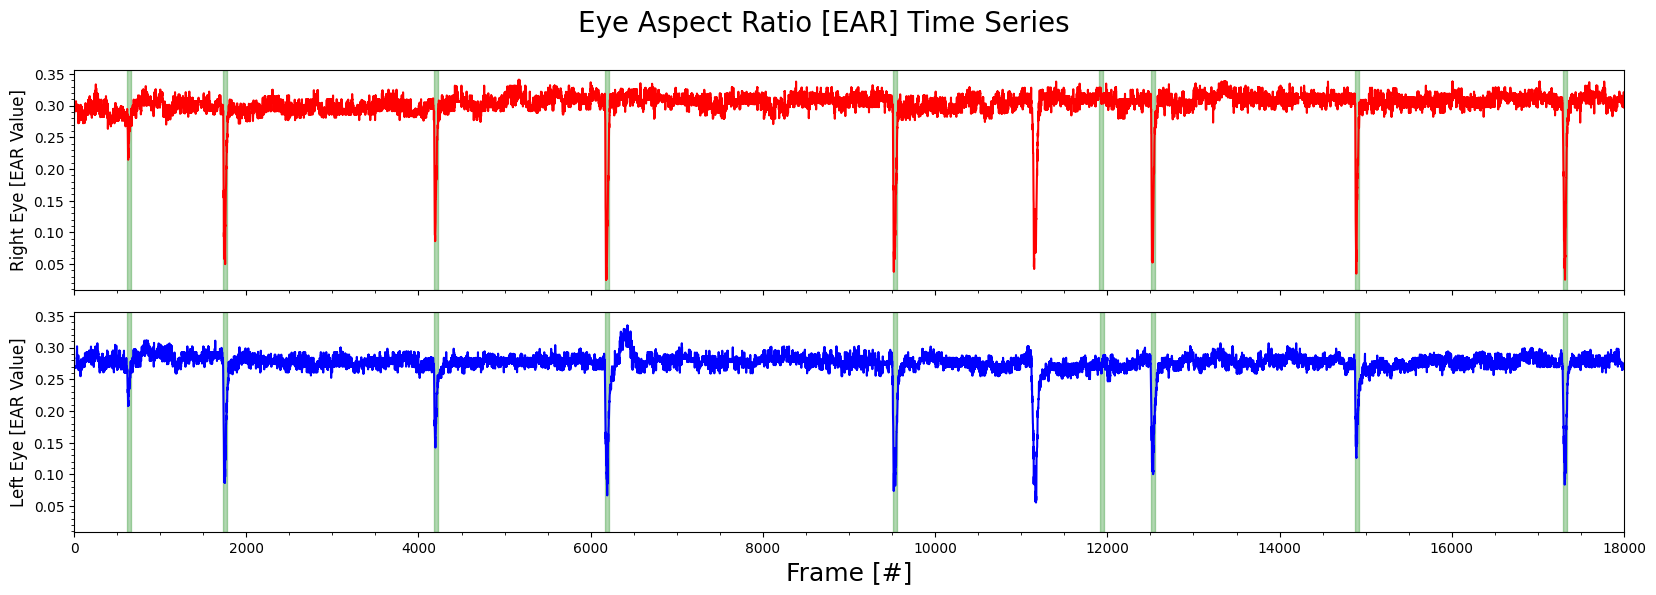

In [13]:
candidates = espbm.unsupervised.extract_candidates(np.concatenate([ear_l, ear_r]), window_length=50)
prototype = candidates[0]
espbm.plot.candidates_overview(candidates=prototype)
matches_l = espbm.match.find_prototype(ear_l, prototype)
matches_r = espbm.match.find_prototype(ear_r, prototype)
matches_l, matches_r = espbm.match.index_matching(matches_l, matches_r)
espbm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()

#### 100

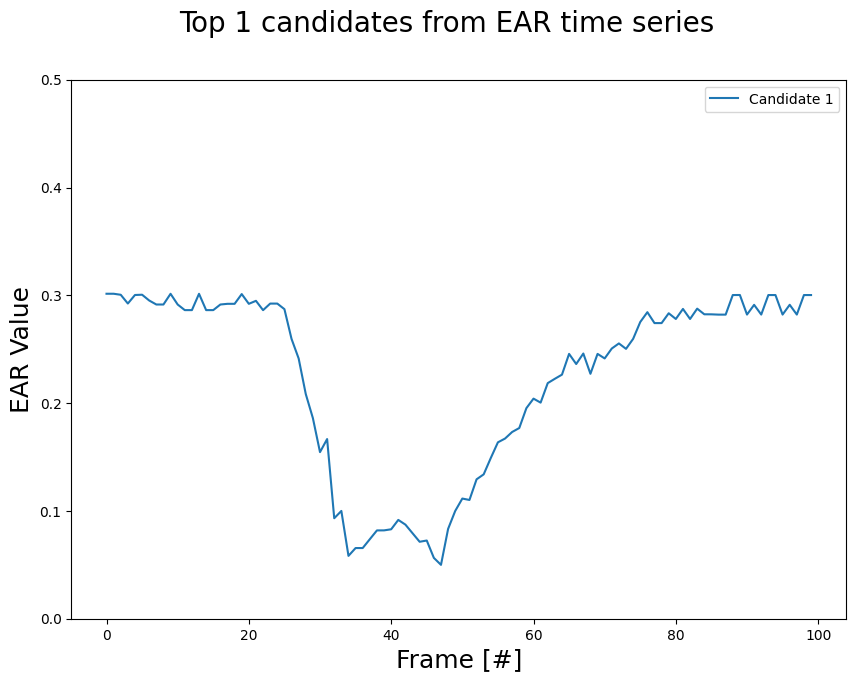

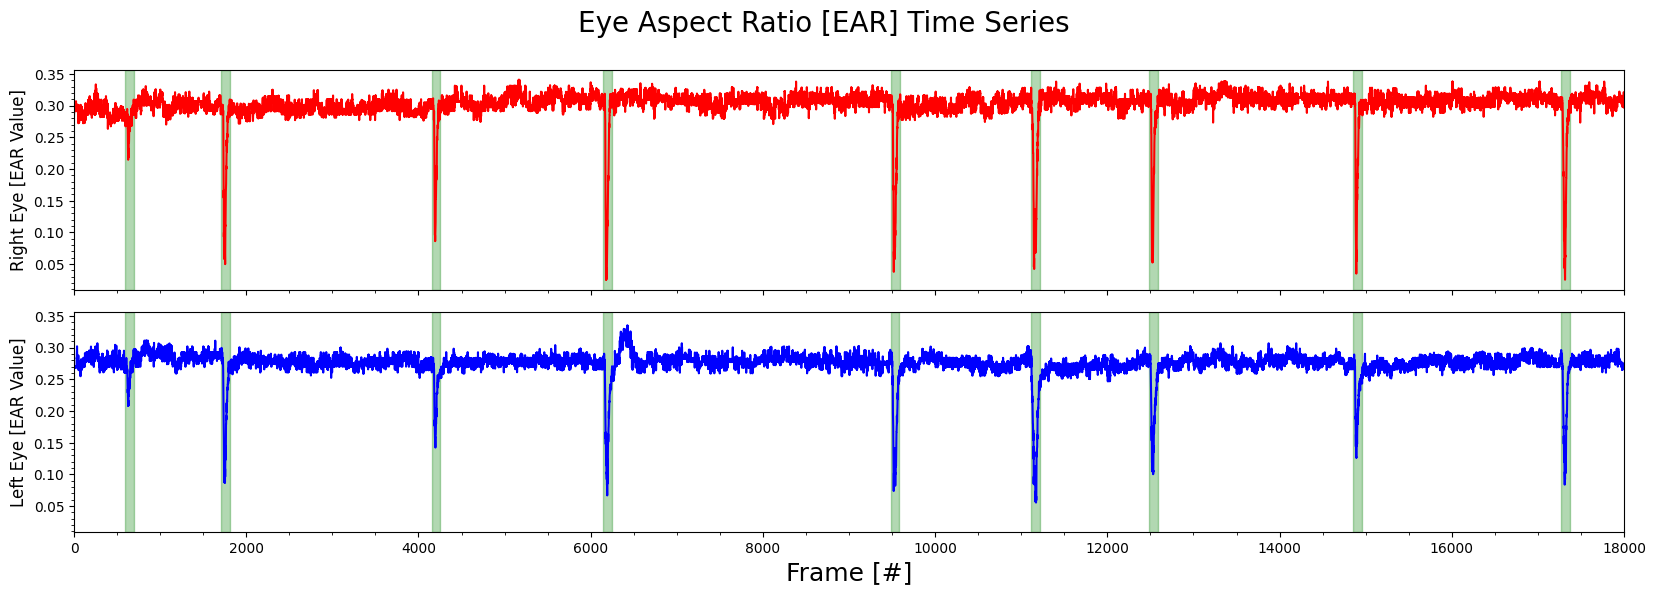

In [14]:
candidates = espbm.unsupervised.extract_candidates(np.concatenate([ear_l, ear_r]), window_length=100)
prototype = candidates[0]
espbm.plot.candidates_overview(candidates=prototype)
matches_l = espbm.match.find_prototype(ear_l, prototype)
matches_r = espbm.match.find_prototype(ear_r, prototype)
matches_l, matches_r = espbm.match.index_matching(matches_l, matches_r)
espbm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()

#### 200

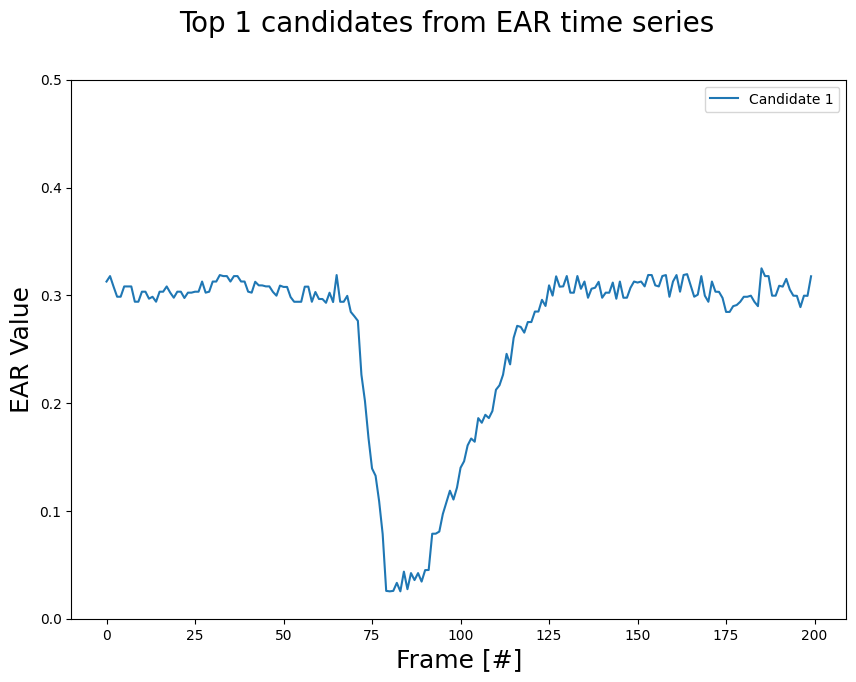

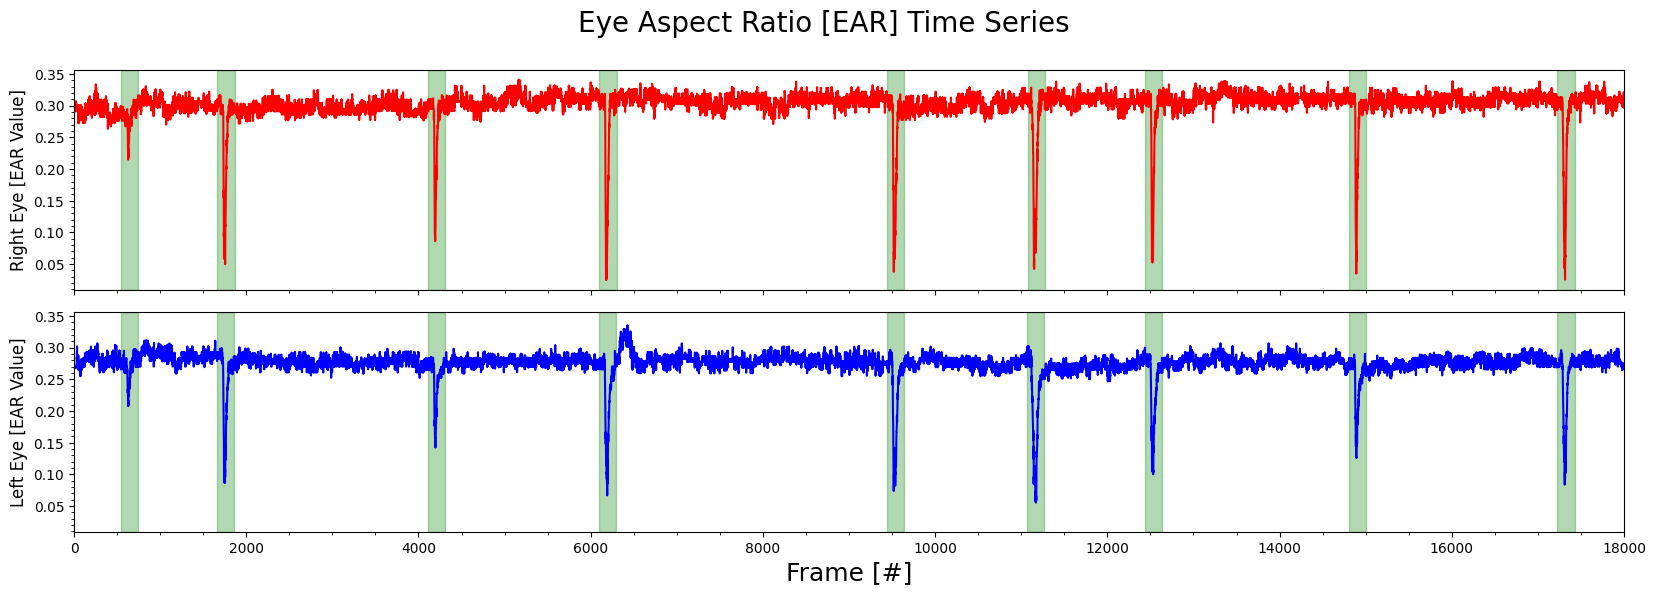

In [15]:
candidates = espbm.unsupervised.extract_candidates(np.concatenate([ear_l, ear_r]), window_length=200)
prototype = candidates[0]
espbm.plot.candidates_overview(candidates=prototype)
matches_l = espbm.match.find_prototype(ear_l, prototype)
matches_r = espbm.match.find_prototype(ear_r, prototype)
matches_l, matches_r = espbm.match.index_matching(matches_l, matches_r)
espbm.plot.matches(ear_l, ear_r, matches_l, matches_r)
plt.show()